<a href="https://colab.research.google.com/github/dnairns-arch/dnairns-arch/blob/main/TimeGPT-TradingBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nixtlats

In [ ]:
from nixtlats import TimeGPT
from google.colab import userdata
import pandas as pd
import os

In [ ]:

timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = userdata.get('TimeGPT_Key')
)
timegpt.validate_token()

True

In [ ]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '/XAUUSD.csv')

Formatting Dataframe to be easier to ngest adn work with and creating datetime column in Pandas format

In [ ]:
df['timestamp'] = df['<DATE>'] + ' ' + df['<TIME>']
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.drop(['<DATE>', '<TIME>'], axis=1)
df = df.rename(columns={'<OPEN>': 'open', '<HIGH>': 'high', '<LOW>': 'low', '<CLOSE>': 'close', '<VOL>': 'volume', '<SPREAD>': 'spread', '<TICKVOL>': 'tick_volume'})
#df = df[df['timestamp'].dt.dayofweek < 5]

In [ ]:
df.head()

,open,high,low,close,tick_volume,volume,spread,timestamp
0,1923.54,1926.75,1923.54,1925.76,185.0,0.0,4.0,2023-10-15 22:01:00
1,1925.88,1926.57,1925.61,1926.16,133.0,0.0,11.0,2023-10-15 22:02:00
2,1926.08,1926.48,1925.34,1926.10,98.0,0.0,27.0,2023-10-15 22:03:00
3,1926.10,1927.67,1925.87,1927.65,78.0,0.0,5.0,2023-10-15 22:04:00
4,1927.65,1927.65,1926.58,1926.66,59.0,0.0,20.0,2023-10-15 22:05:00


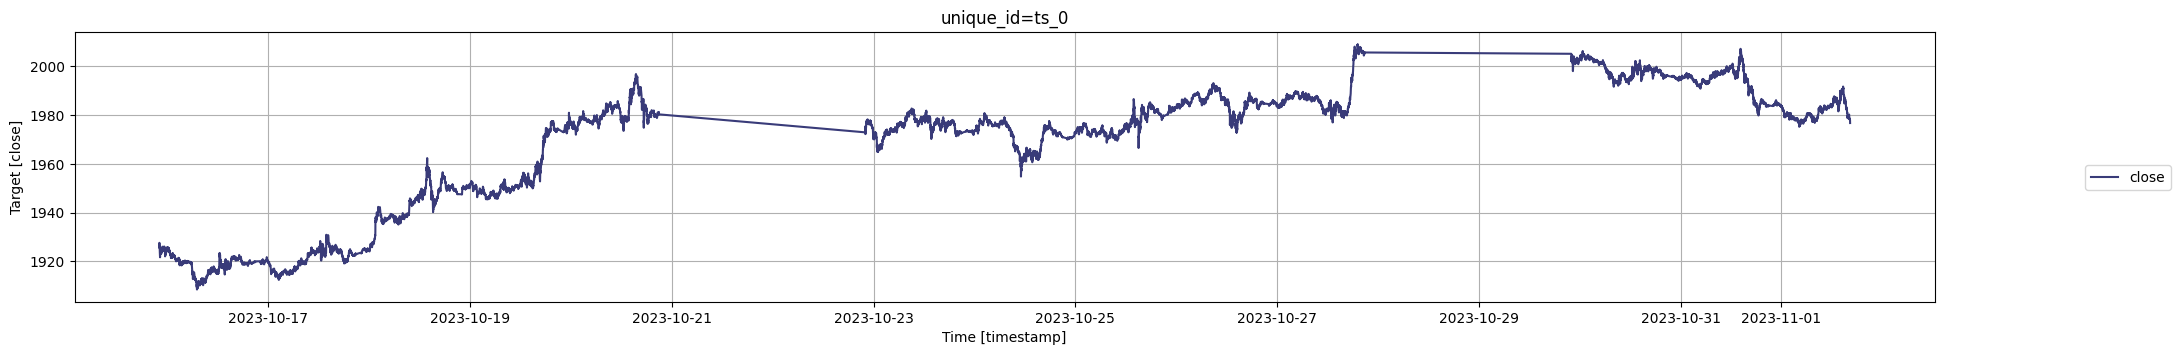

In [ ]:
timegpt.plot(df, time_col='timestamp', target_col='close')

In [ ]:
df = df.dropna(subset=['close'])

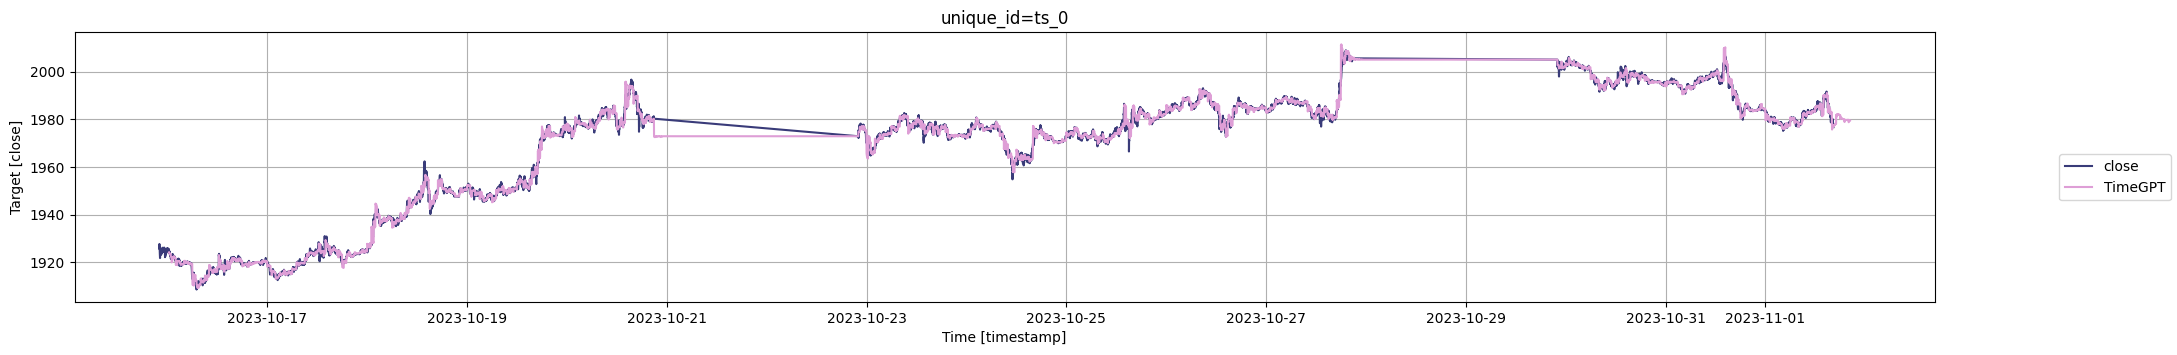

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=240, time_col='timestamp', target_col='close', freq='T', add_history=True, date_features=True)
timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='close')
#df = df[df['timestamp'].dt.dayofweek < 5]
#timegpt_fcst_df = timegpt_fcst_df[timegpt_fcst_df['timestamp'].dt.daysofweek < 5]

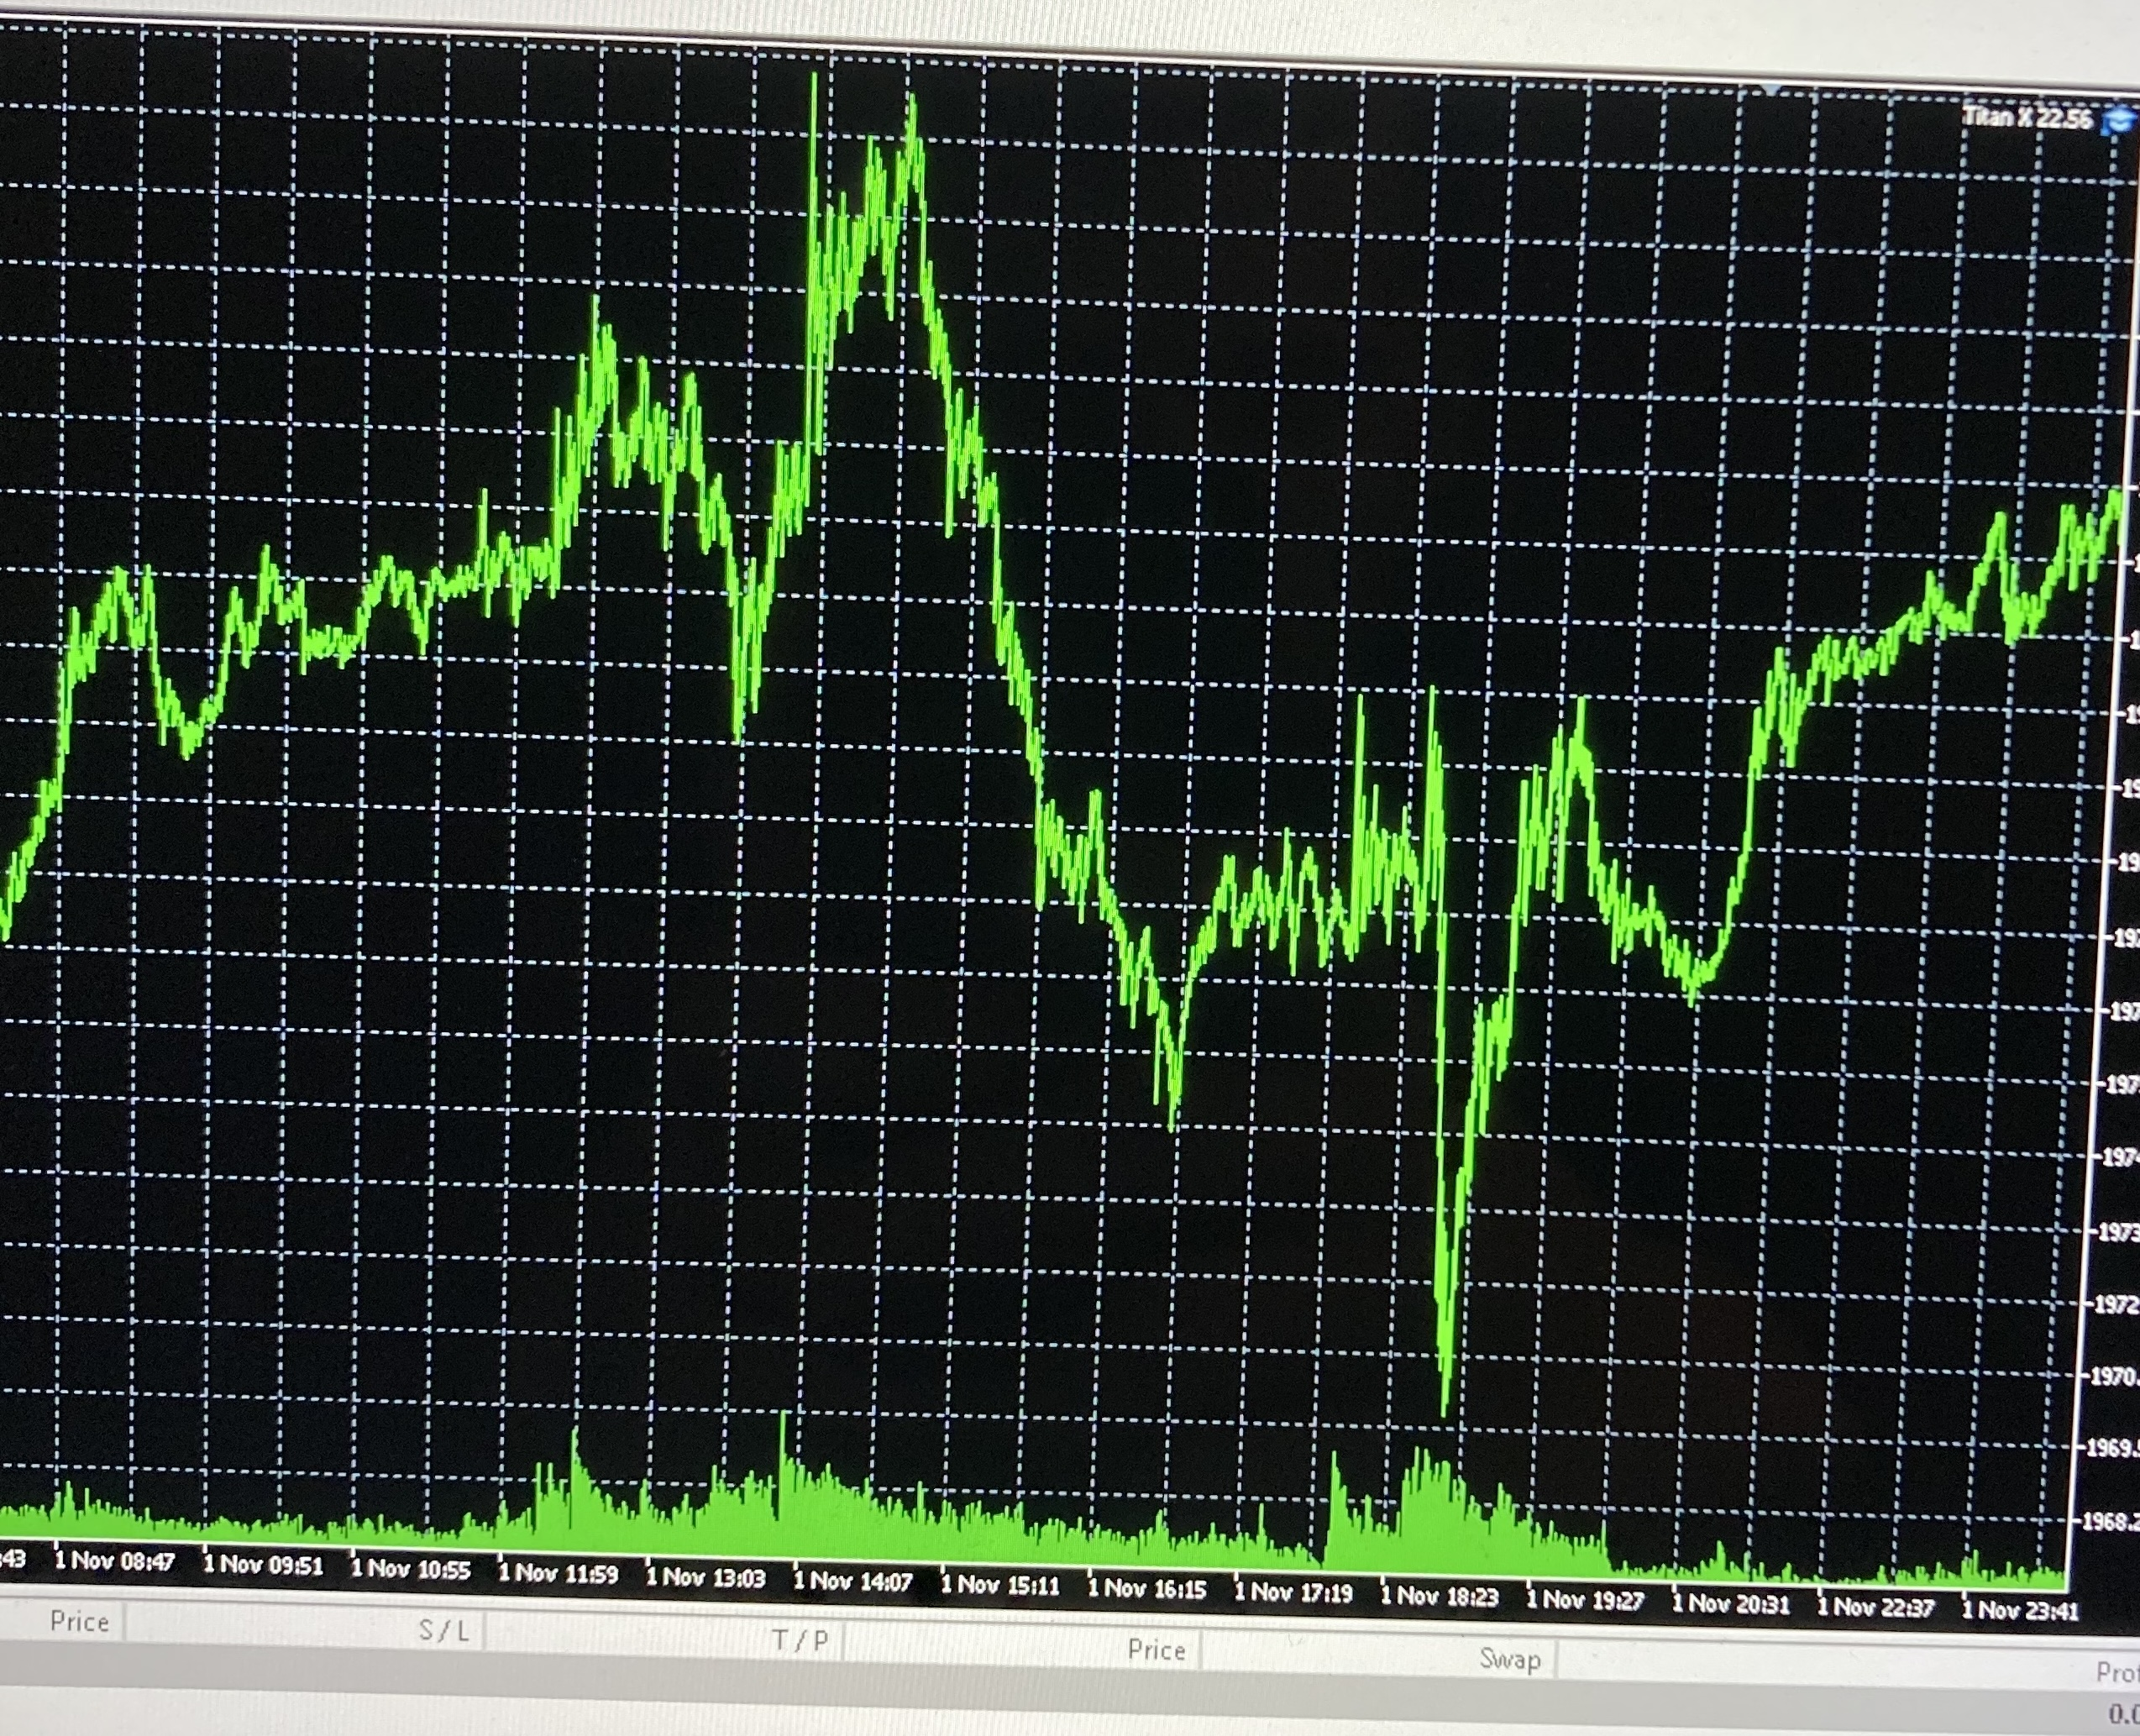